# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**   - Deepak Singh Bisht

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

### Dataset Loading

In [5]:
def convert_publishing_year(x):
    try:
        return pd.to_datetime(x, format= "%Y")
    except ValueError:
        return None

In [6]:
books_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv", converters= {"Year-Of-Publication": convert_publishing_year})#.dropna()
ratings_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")#.dropna()
users_df= pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

### Dataset First View

In [7]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991-01-01,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [47]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [48]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Renaming Columns

### Dataset Rows & Columns count

In [49]:
print("Shape of")
print(f"books_df: {books_df.shape}")
print(f"ratings_df: {ratings_df.shape}")
print(f"users_df: {users_df.shape}")

Shape of
books_df: (271360, 8)
ratings_df: (1149780, 3)
users_df: (278858, 3)


### Dataset Information

In [50]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ISBN                 271360 non-null  object        
 1   Book-Title           271360 non-null  object        
 2   Book-Author          271358 non-null  object        
 3   Year-Of-Publication  266737 non-null  datetime64[ns]
 4   Publisher            271358 non-null  object        
 5   Image-URL-S          271360 non-null  object        
 6   Image-URL-M          271360 non-null  object        
 7   Image-URL-L          271357 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 16.6+ MB


In [51]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [52]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [53]:
print("Number of Duplicated rows in ")
print(f"books_df: {books_df.duplicated().sum()}")
print(f"ratings_df: {ratings_df.duplicated().sum()}")
print(f"users_df: {users_df.duplicated().sum()}")

Number of Duplicated rows in 
books_df: 0
ratings_df: 0
users_df: 0


#### Missing Values/Null Values

In [54]:
print("Number of Missing Values in ")
print(f"books_df:\n{books_df.isnull().sum()}")
print(f"ratings_df:\n{ratings_df.isnull().sum()}")
print(f"users_df:\n{users_df.isnull().sum()}")

Number of Missing Values in 
books_df:
ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4623
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64
ratings_df:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
users_df:
User-ID          0
Location         0
Age         110762
dtype: int64


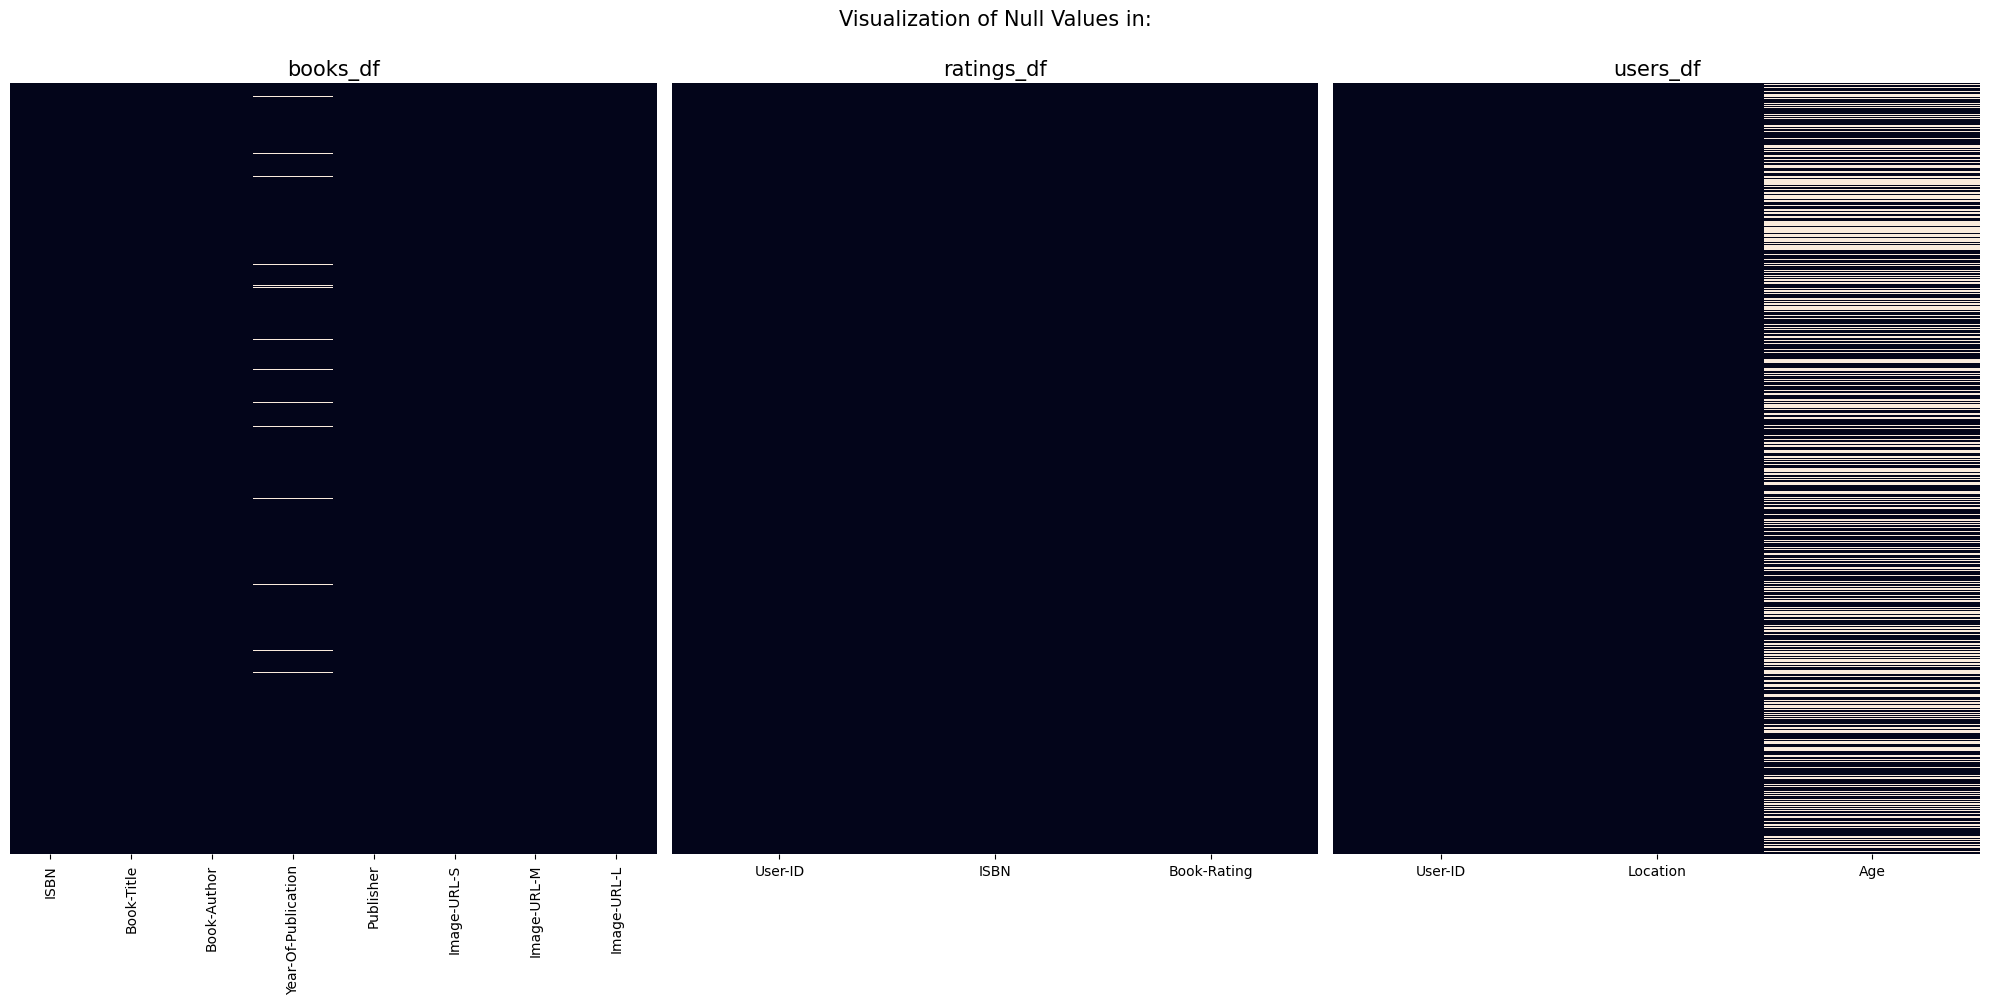

In [55]:
fig, axes= plt.subplots(1, 3, figsize= (20, 10))

sns.heatmap(books_df.isnull(), cbar= False, ax= axes[0])
axes[0].set_title("books_df", fontsize= 15)
axes[0].set_yticks([])
sns.heatmap(ratings_df.isnull(), cbar= False, ax= axes[1])
axes[1].set_yticks([])
axes[1].set_title("ratings_df", fontsize= 15)
sns.heatmap(users_df.isnull(), cbar= False, ax= axes[2])
axes[2].set_yticks([])
axes[2].set_title("users_df", fontsize= 15)

suptitle= fig.suptitle("Visualization of Null Values in:", fontsize= 15)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

### What did you know about your dataset?

None of the three dataframes that we'll be working with has any duplicate values. 
As for null values, user_df has none, where as books_df has a few null values in author, year and publisher, which are minimal compared to the overall data, so they can be removed w/o any significant loss of data. ratings_df has 110762 null values in age. 

## ***2. Understanding Your Variables***

In [56]:
print("Variables in ")
print(f"books_df:\n{books_df.columns.tolist()}")
print(f"ratings_df:\n{ratings_df.columns.tolist()}")
print(f"users_df:\n{users_df.columns.tolist()}")

Variables in 
books_df:
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
ratings_df:
['User-ID', 'ISBN', 'Book-Rating']
users_df:
['User-ID', 'Location', 'Age']


In [57]:
print("Description of ")
print(f"books_df:\n{books_df.describe(include= 'all')}")
print(f"ratings_df:\n{ratings_df.describe(include= 'all')}")
print(f"users_df:\n{users_df.describe(include= 'all')}")

Description of 
books_df:
              ISBN      Book-Title      Book-Author  \
count       271360          271360           271358   
unique      271360          242135           102022   
top     0195153448  Selected Poems  Agatha Christie   
freq             1              27              632   
mean           NaN             NaN              NaN   
min            NaN             NaN              NaN   
25%            NaN             NaN              NaN   
50%            NaN             NaN              NaN   
75%            NaN             NaN              NaN   
max            NaN             NaN              NaN   

                  Year-Of-Publication  Publisher  \
count                          266737     271358   
unique                            NaN      16807   
top                               NaN  Harlequin   
freq                              NaN       7535   
mean    1993-09-11 05:58:28.251198848        NaN   
min               1806-01-01 00:00:00        NaN   
25% 

### Variables Description of


**books_df**   

<div style="text-align: left; display: inline-block;">
    
| variable  | description               |
|-----------|---------------------------|
| isbn      | isbn code of the book     |
| title     | title of the book         |
| author    | author(s) of the book     |
| publisher | publisher(s) of the book  |
| year      | year the book was published|

</div>

**ratings_df**  

<div style="text-align: left; display: inline-block;">
    
|variable|description|
|--------|-----------|
|id|unique identification number given to each user|
|rating|user's rating of the book,either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0|
|isbn|isbn code of the book|

</div>

**users_df**  

<div style="text-align: left; display: inline-block;">
    
|variable|description|
|--------|-----------|
|id|unique identification number given to each user|
|location|a nominal variable, denoting the city, state/province and country of the user|
|age|user's age|
    
</div>

## 3. ***Data Wrangling***

### Data Wrangling Code

In [58]:
books_df.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               2
Year-Of-Publication    4623
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

In [59]:
# def rename_cols(X):
#     X.columns= X.columns.str.lower().str.split("-").map(lambda x: x[0] if x[0]== "year" else x[-1])
#     return X

In [60]:
# books_df= rename_cols(books_df)
# ratings_df= rename_cols(ratings_df)
# users_df= rename_cols(users_df)

In [8]:
def rename_cols(X):
    x= lambda x: x[0] if x[0]== "year" else x[-1]
    return x(X.lower().split("-"))

In [9]:
def tweak_books_df(X):
    
    def extract_isbn_mapping(Y):
        x= (Y.groupby(['title', 'author'], as_index= False)
            ['isbn'].agg(list)
            ["isbn"].tolist()
           )
        globals()["isbn_mapping"]= dict()
        for i in x:
            for j in i:
                isbn_mapping[j]= i[0]
        return Y
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .drop(columns= ["s", "m", "l"])
        .dropna()
        #although there are few null values in the author variable, there are some "Not Applicable (Na)" values
        .query("author!= 'Not Applicable (Na )'")
        .assign(
            title= lambda x: (
                x["title"]
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r"(\([^)]*\))", "", regex= True)
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                #removing unwanted characters
                .str.replace(r"[\\\[\](\.{2,})(\-{2,})]", "", regex= True)
                .str.replace(r"(\-{2,})", "", regex= True)
                .str.replace(r"(\.{2,})", "", regex= True)
                #removing un-necessary spaces
                .str.replace(r'\s+', " ", regex= True)
                .str.title().str.strip()
            ),
            author= lambda x: (
                x["author"]
                #rewriting "and"
                .str.replace(r"&amp;", "and", regex= True)
                #removing unwanted characters
                .str.replace(r'[\'\\;\"\-\[\]]', "", regex= True)
                #adding a period(.) at the last name initials
                .str.replace(r'([A-Z]\.\s[A-Z])\s([A-Z][a-z]+)',r"\g<1>. \g<2>", regex= True)
                #removing space b/w first and middle initials 
                .str.replace(r'([A-Z]\.)\s([A-Z]\.)', r"\g<1>\g<2>", regex= True)
                #removing "et al."
                .str.replace(r'(et\sal[\.\s])', "", regex= True, flags= re.IGNORECASE)
                #removing characters in-between parenthesis, including parenthesis
                .str.replace(r'(\([^)]*\))', "", regex= True)
                #removing extra spaces from in-between characters
                .str.replace(r'\s+', " ", regex=True)
                .str.title().str.strip()
            ),
            publisher= lambda x: (
                x["publisher"]
                .str.replace(r"&amp;", "", regex= True)
                .str.title().str.strip()
            ),
        )
        #after the above manipulations, some of the book titles have be completely oblitrated
        .query("title!= ''")
        #extracting isbn codes and mapping them to another isbn code 
        .pipe(extract_isbn_mapping)
        #
        .assign(
            isbn= lambda x: x["isbn"].map(isbn_mapping)
        )
        .drop_duplicates(["isbn", "title", "author"])
        .reset_index(drop= True)
    )

In [10]:
tweaked_books_df= tweak_books_df(books_df)
tweaked_books_df.head()

,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P.O. Morford,2002-01-01,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,Harperflamingo Canada
2,0060973129,Decision In Normandy,Carlo Deste,1991-01-01,Harperperennial
3,0374157065,Flu: The Story Of The Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux
4,0393045218,The Mummies Of Urumchi,E.J. W. Barber,1999-01-01,W. W. Norton Company


In [11]:
def tweak_ratings_df(X, min_ratings):
    
    def extract_active_users(Y, min_ratings):
        globals()["active_users"]= (
            Y
            .groupby("id", as_index= False)
            .size()
            .query("size>= @min_ratings")
            ["id"]
        ).to_list()

        return Y
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .query("rating!= 0")
        .assign(
            isbn= lambda x: (
                x["isbn"]
                .map(isbn_mapping)
                .fillna(x["isbn"])
            )
        )
        .pipe(extract_active_users, min_ratings= min_ratings)
        .assign(
            is_active= lambda x: np.where(x["id"].isin(active_users), 1, 0)
        )
        .reset_index(drop= True)
    )

In [12]:
min_ratings= 100
tweaked_ratings_df= tweak_ratings_df(ratings_df, min_ratings= min_ratings)
tweaked_ratings_df.head()

,id,isbn,rating,is_active
0,276726,0155061224,5,0
1,276729,052165615X,3,0
2,276729,0521795028,6,0
3,276736,3257224281,8,0
4,276737,0600570967,6,0


In [13]:
def tweak_users_df(X):
    
    mean_age= X["Age"].mean().round(2)
    
    return (
        X
        .rename(rename_cols, axis= 1)
        .assign(
            country= lambda x: (
                x["location"]
                .str.split(",")
                .map(lambda x: x[-1])
                .str.replace(r"[.@öð¹ú_\"!0-9/\\`?{*&ãº>}=\-¸äå½#;]", "", regex= True)
                .str.strip().str.title()
            ),
            age= lambda x: x["age"].fillna(mean_age),
            is_active= lambda x: np.where(x["id"].isin(active_users), 1, 0)
        )
        .drop(columns= ["location"])
    )

In [14]:
tweaked_users_df= tweak_users_df(users_df)
tweaked_users_df.head()

,id,age,country,is_active
0,1,34.75,Usa,0
1,2,18.00,Usa,0
2,3,34.75,Russia,0
3,4,17.00,Portugal,0
4,5,34.75,United Kingdom,0


### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

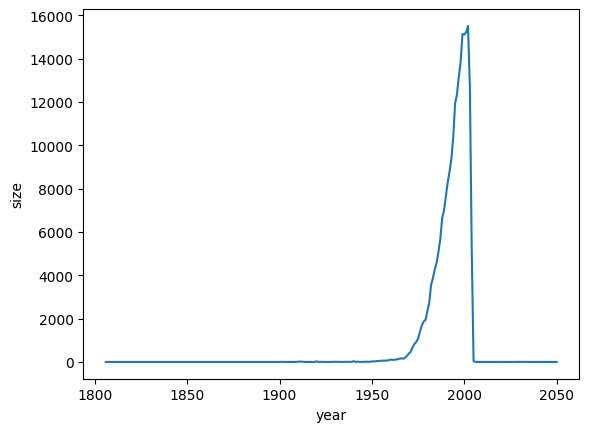

In [15]:
time_series_df= (
    tweaked_books_df
    .groupby(tweaked_books_df["year"].dt.year, as_index= False)
    .size()
)

sns.lineplot(data= time_series_df, x= "year", y= "size")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [16]:
print(tweaked_books_df["author"].nunique())
print(tweaked_books_df["publisher"].nunique())

97038
15840


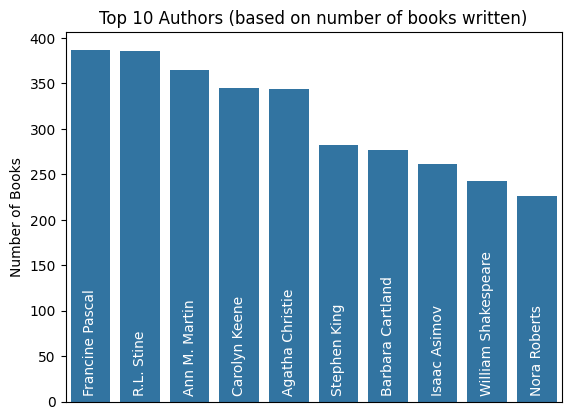

In [17]:
top_ten_authors= (
    tweaked_books_df
    .groupby(["author"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    .iloc[:10]
)

sns.barplot(
    data= top_ten_authors,
    x= "author", y= "size",
    color= "#1f77b4"
)

plt.tick_params(bottom = False) 

plt.xticks(rotation= "vertical", position= (0.0, 0.05), color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")

plt.title("Top 10 Authors (based on number of books written)")
plt.xlabel(None)
plt.ylabel("Number of Books")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

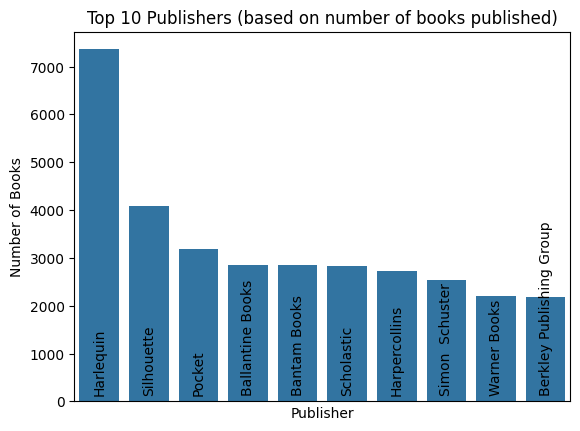

In [95]:
top_ten_publishers= (
    tweaked_books_df
    .groupby(["publisher"], as_index= False)
    .size()
    .sort_values("size", ascending= False, ignore_index= True)
    .iloc[:10]
)

sns.barplot(
    data= top_ten_publishers,
    x= "publisher", y= "size",
    color= "#1f77b4"
)
plt.tick_params(bottom = False)
plt.xticks(rotation= "vertical", position= (0.0, 0.05), #color= "white",
           horizontalalignment= "center", verticalalignment= "baseline")
plt.xlabel("Publisher")
plt.ylabel("Number of Books")
plt.title("Top 10 Publishers (based on number of books published)")
plt.show()

In [96]:
tweaked_ratings_df.head()

,id,isbn,rating,is_active
0,276725,034545104X,0,0
1,276726,0155061224,5,0
2,276727,0446605239,0,0
3,276729,052165615X,3,0
4,276729,0521795028,6,0


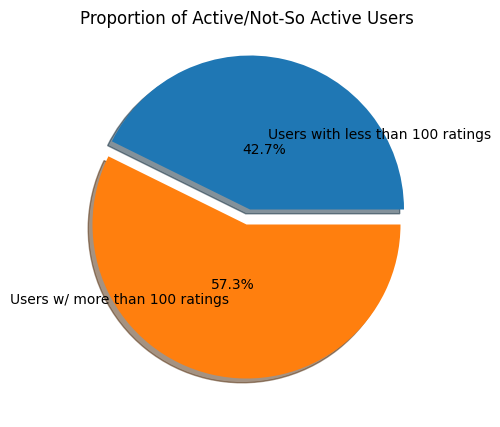

In [97]:
#percentage of ratings by active users compared to non-active users
ratings_by_active_users= (
    tweaked_ratings_df
    .groupby("is_active", as_index= False).agg({"id": "count"})
    .assign(
        is_active= lambda x: x["is_active"].map({0: f"Users with less than {min_ratings} ratings", 1: f"Users w/ more than {min_ratings} ratings"})
    )
)


fig= plt.figure(figsize= (5, 5))
plt.pie(
    "id", labels= "is_active", 
    explode= (0.1, 0), shadow= True,
    data= ratings_by_active_users, 
    autopct='%1.1f%%', pctdistance= 0.4,
    labeldistance= 0.5
)

plt.title("Proportion of Active/Not-So Active Users")
plt.show()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [54]:
def pareto_df(df, threshold= 80, customized= True):
    """
    creates a df with proportion column containing all the individual elements <= the threshold value,
    and ends with the sum of the remaining
    """
    
    total_size= df["size"].sum()
    
    def customize_df(df_, threshold):
        
        
        a= np.select(
            [df_["cumperc"]<= i for i in percentage],
            []
        )
        
    
        return (
            pd.concat(
                [
                    df_.loc[df_["cumperc"]<= threshold],
                    pd.DataFrame(
                        [[f"Remaining {len(df_bottom)}",
                         df_bottom["size"].sum(),
                         100]],
                        columns= df_.columns, 
#                         name= "abc"
                    )
                ],
                ignore_index= True,
                join= "outer",
#                 sort= True,
                axis= 0
            )
        )

    df_base= (
        df
        .sort_values("size", ascending= False)
        .assign(cumperc= lambda row: round(row["size"].cumsum()/total_size*100, 2))
        .reset_index(drop= True)
    )
    if not customized:
        return df_base
        #returning dataframe containing entries with cumperc less than the threshold value and the remaining as one single entry
    else:
        return (
            df_base
            .pipe(customize_df, threshold)
        )

In [55]:
contribution_by_id= (
    tweaked_ratings_df
    .groupby(["id"], as_index= False)
    .size()
    .sort_values("size", ascending= False)
    .pipe(pareto_df, threshold= 80, customized= False)
)
contribution_by_id

,id,size,cumperc
0,11676,8524,1.97
1,98391,5802,3.30
2,153662,1969,3.76
3,189835,1906,4.20
4,23902,1395,4.52
...,...,...,...
77800,270045,1,100.00
77801,270050,1,100.00
77802,1500,1,100.00
77803,270054,1,100.00


In [77]:
start= range(0, 90, 10)
stop= range(10, 100, 10)
[(i, j) for i, j in zip(start, stop)]
list(range(0, 101, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [78]:
bins= pd.cut(contribution_by_id["cumperc"], bins= list(range(0, 101, 10)))
df= contribution_by_id.groupby(bins)['size'].sum().reset_index()
df.columns = ['Cumulative Percentage Bin', 'Size']
df

,Cumulative Percentage Bin,Size
0,"(0, 10]",43147
1,"(10, 20]",43603
2,"(20, 30]",43290
3,"(30, 40]",43433
4,"(40, 50]",43368
5,"(50, 60]",43381
6,"(60, 70]",43364
7,"(70, 80]",43371
8,"(80, 90]",43368
9,"(90, 100]",43346


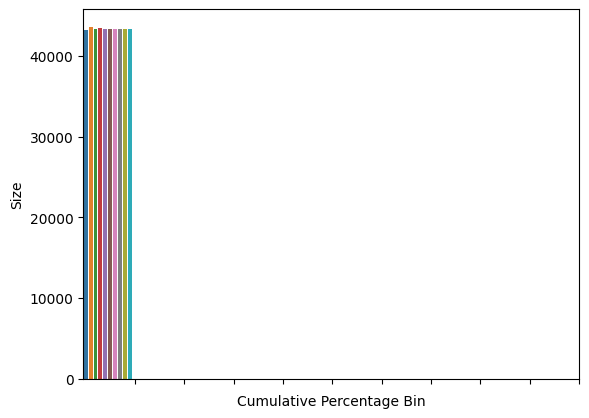

In [87]:
sns.barplot(data= df, x= "Cumulative Percentage Bin", y= "Size")
plt.xticks(np.arange(10, 101, 10))
plt.show()

In [ ]:
percentage= list(range(0, 100, 10))

for i in percentage:
    print(i)
    if i
        print(contribution_by_id["size"].sum())

In [123]:
np.round(contribution_by_id.shape[0]/(contribution_by_id.shape[0]+ int(contribution_by_id.iloc[-1, 0].split(" ")[-1]))*100, 2)

20.4

In [125]:
from matplotlib.ticker import PercentFormatter

ValueError: Unable to parse string "Remaining 61931" at position 15874

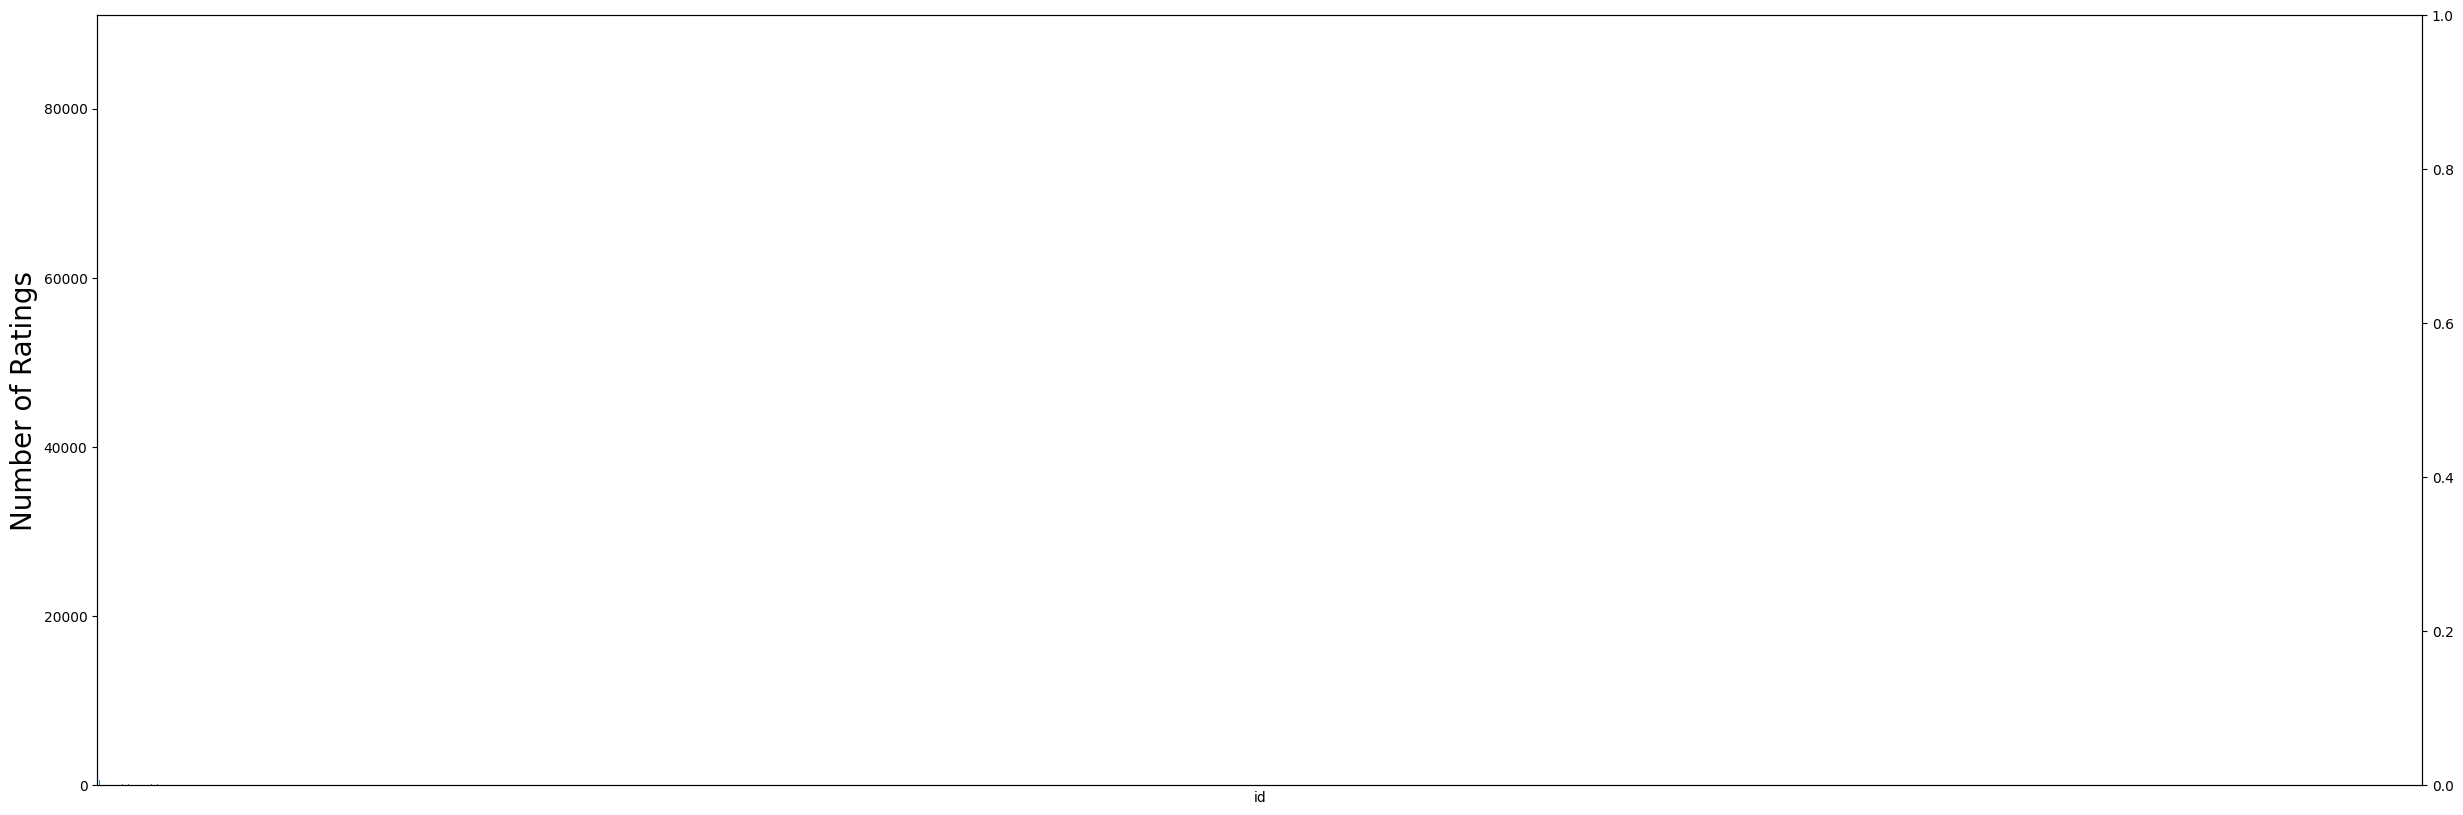

In [131]:
#creating a pareto chart
#initializing
fig, ax= plt.subplots(figsize= (30, 10), sharex= True)

#bar chart
sns.barplot(
    data= contribution_by_id, x= "id", y=  "size", 
    width= 0.08,color= "#1984c5",
    ax= ax
)

#customising the primary y axis
ax.tick_params(bottom= False, labelbottom= False)
ax.set_ylabel("Number of Ratings", fontsize= 20)

#aligning the first and last bars near to the edges
ax.set_xmargin(1e-10)

#removing grid lines for the primary axis
ax.grid(False)

#plotting the cumulative percentage of bookings for agents as a line plot
ax2= ax.twinx()
ax2.lineplot(data= contribution_by_id, x= "id", y= "cumperc", 
             color= "#c23728", ax= ax2)

#customising the secondary y axis
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(labelsize= 15)
ax2.set_ylabel("Cumulative %age of Ratings", fontsize= 20)

#aligning the secondary y axis with the primary y axis
ax2.set_ylim(0,105)
ax2.set_axisbelow(True)

#show
plt.show()

In [ ]:
# fig= plt.figure(figsize= (30, 10))
# sns.barplot(
#     data= contribution_by_id, x= "id",y= "size", 
#     order= contribution_by_id["id"],
#     color= "#1984c5", width= 0.1
# )
# plt.margins(0.1)
# 
# plt.ylim(0, 4000)
# # plt.ylabel("Number of Books rated")
# plt.show()

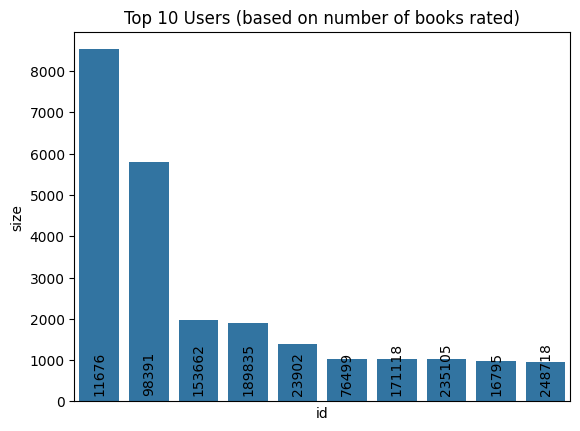

In [104]:
#id which made the most contribution
top_ten_ids= (
    tweaked_ratings_df
    .groupby("id", as_index= False)
    .size()
    .sort_values("size", ascending= False)
    [:10]
)


sns.barplot(
    data= top_ten_ids, y= "size", x= "id", 
    order= top_ten_ids["id"],
    color= "#1f77b4"
)

plt.xticks(
    rotation= "vertical", position= (0.0, 0.05), #color= "white",
    horizontalalignment= "center", verticalalignment= "baseline"
)
plt.tick_params(bottom = False) 
plt.title("Top 10 Users (based on number of books rated)")
plt.show()

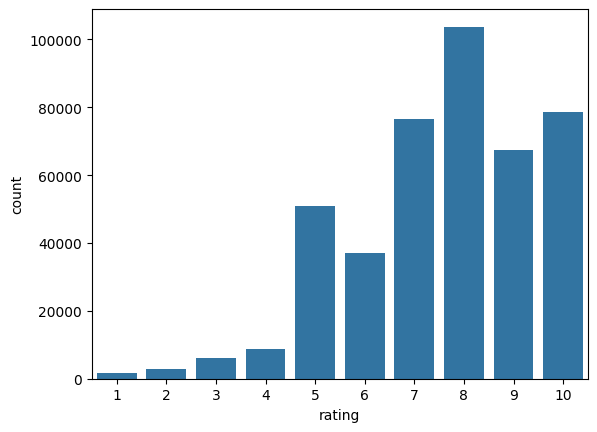

In [106]:
#histplot of ratings
sns.countplot(data= tweaked_ratings_df, x= "rating",
    color= "#1f77b4")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [107]:
tweaked_users_df.head()

,id,age,country,is_active
0,1,34.75,Usa,0
1,2,18.00,Usa,0
2,3,34.75,Russia,0
3,4,17.00,Portugal,0
4,5,34.75,United Kingdom,0


In [108]:
tweaked_users_df["age"].min()

0.0

In [109]:
#geo map of users
tweaked_users_df["age"].apply(lambda x: x+1e-5)

0         34.75001
1         18.00001
2         34.75001
3         17.00001
4         34.75001
            ...   
278853    34.75001
278854    50.00001
278855    34.75001
278856    34.75001
278857    34.75001
Name: age, Length: 278858, dtype: float64

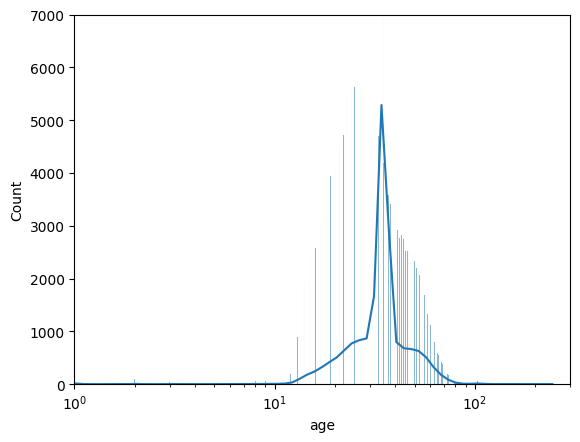

In [118]:
#age wise distribution of users
sns.histplot(data= tweaked_users_df["age"].apply(lambda x: x+1e-5), kde= True, log_scale= True)
plt.ylim(0, 7000)
plt.xlim(1, 300)
plt.show()

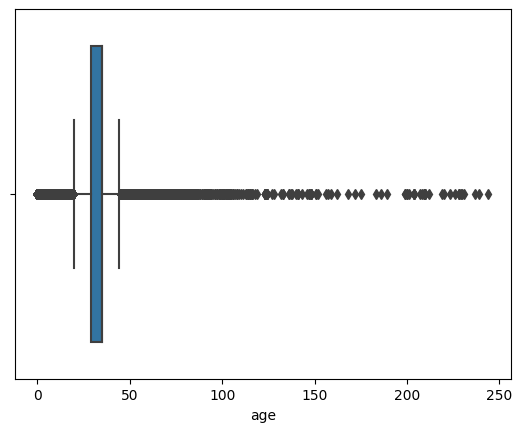

In [111]:
sns.boxplot(data= tweaked_users_df, x= "age")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Popularity Based Recommendations

 $ \text{Weighted Rating (WR)} = \left( \frac{v}{v+m} \right) \cdot R + \left( \frac{m}{v+m} \right) \cdot C
 $  
 where,  
 v= num of votes,  
 m= min num of votes required to be listed in the Top 50,  
 R= mean book rating,  
 C= mean vote across the whole report,  

In [116]:
def calc_weighted_rating(X, Y, min_votes= 100):
    
    def extract_mean_report_rating(Z):
        globals()["mean_report_rating"]= Y["rating"].mean()
        return Z
    
    return (
        pd.merge(
            X[["isbn", "title", "author"]], Y[["isbn", "rating", "id"]], 
            on= "isbn", how= "right"
        )
        .dropna()
        .pipe(extract_mean_report_rating)
        .groupby(["isbn", "title", "author"], as_index= False)
        .agg({"rating": np.mean, "id": "count"})
        .rename(columns= {"rating": "avg_rating", "id": "num_votes"})
        .assign(
            weighted_rating= lambda x: (
                (x["num_votes"]/(x["num_votes"]+ min_votes))*x["avg_rating"] + 
                (min_votes/(min_votes+ x["num_votes"]))* mean_report_rating
            )
        )
        .sort_values("weighted_rating", ascending= False)
        .reset_index(drop= True)
        [["isbn", "title", "author", "weighted_rating"]]
    )

In [117]:
top_50_popular_books= calc_weighted_rating(tweaked_books_df, tweaked_ratings_df).loc[:50]
top_50_popular_books#.head(50)

,isbn,title,author,weighted_rating
0,059035342X,Harry Potter And The Sorcerer'S Stone,J.K. Rowling,8.756438
1,0439139597,Harry Potter And The Goblet Of Fire,J.K. Rowling,8.692392
2,0439136350,Harry Potter And The Prisoner Of Azkaban,J.K. Rowling,8.666088
3,0446310786,To Kill A Mockingbird,Harper Lee,8.603551
4,043935806X,Harry Potter And The Order Of The Phoenix,J.K. Rowling,8.587640
5,0439064872,Harry Potter And The Chamber Of Secrets,J.K. Rowling,8.559878
6,0345339738,The Return Of The King,J.R.R. Tolkien,8.403904
7,0312853238,Ender'S Game,Orson Scott Card,8.388458
8,0156528207,The Little Prince,Antoine De Saintexupã©Ry,8.372496
9,055321215X,Pride And Prejudice,Jane Austen,8.372462


### Colaborative Filtering